# Assignment #7: Machine Learning Projects
## Overview
This notebook contains five machine learning projects demonstrating various regression concepts:
1. House Price Prediction System
2. Salary Prediction System
3. Stock Price Trend Prediction
4. Customer Churn Prediction
5. Energy Consumption Prediction

Each project includes code implementation, data preprocessing, model training, and evaluation.

## Project 1: House Price Prediction System
### Concepts Used:
- Linear Regression Model
- Cost Function (MSE)
- Ordinary Least Squares (OLS)
- R-squared & Adjusted R-squared
### Tasks:
1. Install dependencies
2. Collect house pricing data
3. Preprocess data
4. Train model
5. Evaluate results

Non-numeric columns: ['municipality_name', 'object_type_name']
Model Evaluation:
MSE: 149210817251.88
R-squared: 0.49
Adjusted R-squared: 0.09


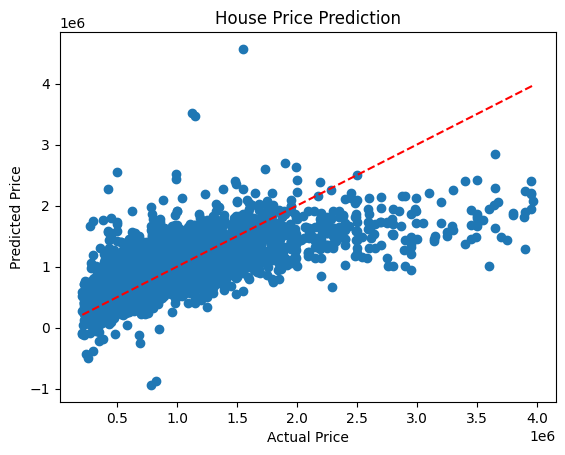

In [2]:
# House Price Prediction System
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset (assuming house_data.csv exists)
try:
    df = pd.read_csv('house_data.csv')
except FileNotFoundError:
    print('Please provide house_data.csv')

# Data preprocessing
non_numeric_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f'Non-numeric columns: {non_numeric_columns}')

if non_numeric_columns:
    df = pd.get_dummies(df, columns=non_numeric_columns, drop_first=True)

if 'price' not in df.columns:
    raise KeyError('The dataset does not contain a price column')

# Features and target
X = df.drop(columns=['price'])
y = df['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Adjusted R-squared calculation
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1-r2) * (n-1) / (n-p-1)

print(f'Model Evaluation:\nMSE: {mse:.2f}\nR-squared: {r2:.2f}\nAdjusted R-squared: {adjusted_r2:.2f}')

# Visualization
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('House Price Prediction')
plt.show()

## Project 2: Salary Prediction System
### Concepts Used:
- Dependent & Independent Variables
- Regression Line & Coefficients
- Gradient Descent Optimization
- Bias-Variance Tradeoff
### Tasks:
1. Install dependencies
2. Collect salary data
3. Define variables
4. Train model
5. Visualize results

MSE: 49830096.86
R-squared: 0.90
Predicted Salary: 115790.21


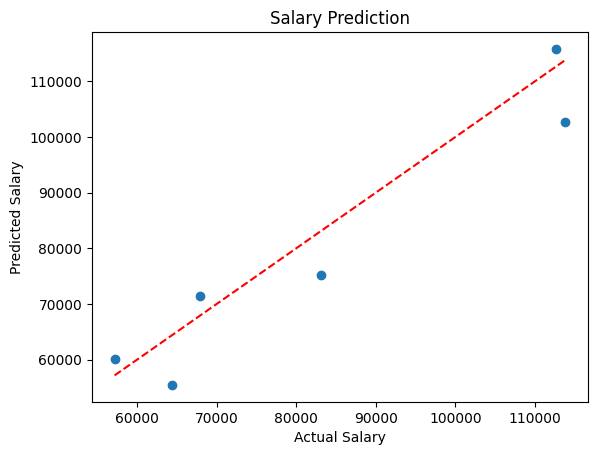

In [3]:
# Salary Prediction System
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
try:
    df = pd.read_csv('salary_data.csv')
except FileNotFoundError:
    print('Please provide salary_data.csv')

# Preprocessing
df.dropna(inplace=True)
categorical_columns = ['degree', 'job_role', 'location']
existing_categorical_columns = [col for col in categorical_columns if col in df.columns]

if existing_categorical_columns:
    df = pd.get_dummies(df, columns=existing_categorical_columns, drop_first=True)

if 'Salary' not in df.columns:
    raise KeyError('Salary column missing')

# Features and target
X = df.drop(columns=['Salary'])
y = df['Salary']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}\nR-squared: {r2:.2f}')

# Sample prediction
sample_input = X_test.iloc[[0]]
predicted_salary = model.predict(sample_input)
print(f'Predicted Salary: {predicted_salary[0]:.2f}')

# Visualization
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Salary Prediction')
plt.show()

## Project 3: Stock Price Trend Prediction
### Concepts Used:
- Equation of a Straight Line
- Ordinary Least Squares (OLS)
- R-squared Evaluation
### Tasks:
1. Install dependencies
2. Fetch stock data
3. Feature engineering
4. Train model
5. Create dashboard

MSE: 291.18
R-squared: 0.81


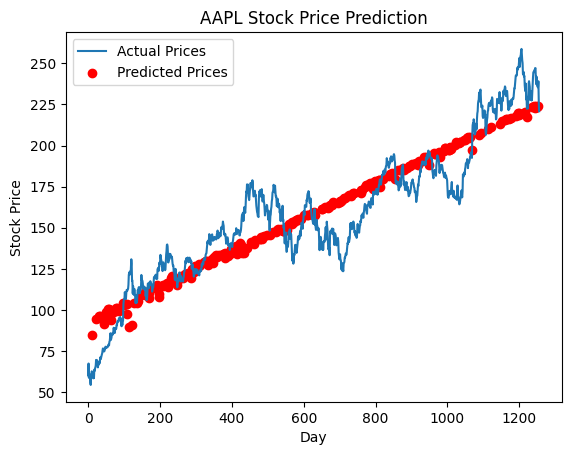

In [4]:
# Stock Price Trend Prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Fetch stock data
def get_stock_data(ticker):
    stock = yf.Ticker(ticker)
    df = stock.history(period='5y')
    df = df[['Close', 'Volume']].dropna()
    df['Day'] = np.arange(len(df))
    return df

ticker = 'AAPL'
df = get_stock_data(ticker)

# Features and target
X = df[['Day', 'Volume']]
y = df['Close']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}\nR-squared: {r2:.2f}')

# Visualization
plt.plot(df['Day'], df['Close'], label='Actual Prices')
plt.scatter(X_test['Day'], y_pred, color='red', label='Predicted Prices')
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.legend()
plt.show()

## Project 4: Customer Churn Prediction
### Concepts Used:
- Cost Function (MSE)
- Bias-Variance Tradeoff
- Regression Coefficients
### Tasks:
1. Install dependencies
2. Collect customer data
3. Define variables
4. Train model
5. Create alert system

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



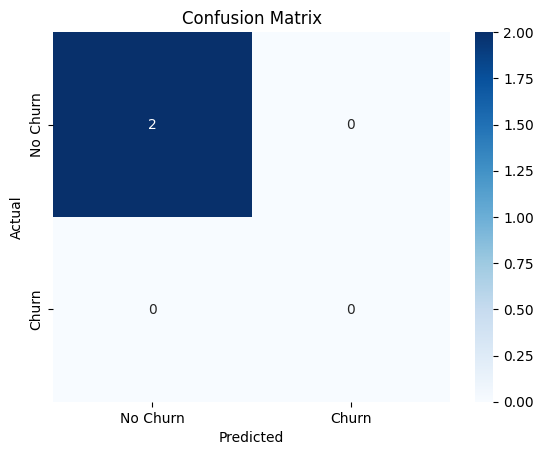

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
try:
    df = pd.read_csv('customer_churn_data.csv')
except FileNotFoundError:
    print('Please provide customer_churn_data.csv')

# Preprocessing
df.dropna(inplace=True)
df['churn'] = df['churn'].astype(str).str.strip().map({'False': 0, 'True': 1})
df = pd.get_dummies(df, columns=['international_plan', 'voice_mail_plan'], drop_first=True)
df.drop(columns=['Id', 'state', 'phone_number'], errors='ignore', inplace=True)

# Features and target
X = df.drop(columns=['churn'])
y = df['churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# Visualization
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Project 5: Energy Consumption Prediction
### Concepts Used:
- Mean Squared Error (MSE)
- Gradient Descent Optimization
- Bias-Variance Tradeoff
### Tasks:
1. Install dependencies
2. Collect energy data
3. EDA
4. Train model
5. Create dashboard

MSE: 2.04
R-squared: 1.00


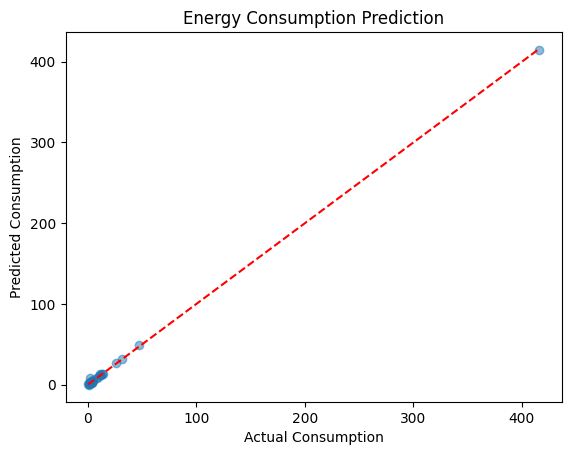

In [10]:
# Energy Consumption Prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
try:
    df = pd.read_csv('owid-energy-data.csv')
except FileNotFoundError:
    print('Please provide owid-energy-data.csv')

# Preprocessing
df.dropna(inplace=True)
energy_columns = [col for col in df.columns if 'consumption' in col.lower()]
if not energy_columns:
    raise KeyError('No energy consumption column found')
energy_column = energy_columns[0]

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if categorical_cols:
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Features and target
X = df.drop(columns=[energy_column])
y = df[energy_column]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}\nR-squared: {r2:.2f}')

# Visualization
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Consumption')
plt.ylabel('Predicted Consumption')
plt.title('Energy Consumption Prediction')
plt.show()